# Test Notebook 
This contains my (RaduW's) tests.


In [1]:
from fastai.interpret import ClassificationInterpretation

from raduw_utils import save_image, remove_bad_images, ensure_dir
from pathlib import Path
from fastai.vision.all import PILImage


In [2]:
image_dir = Path("./my-images")
bear_dir = image_dir / f"bears"

In [11]:
remove_bad_images(image_dir)            

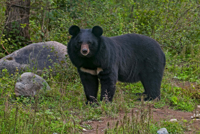

In [18]:
# show a black bear
images = list((bear_dir / "black") .glob("*.jpg"))
im = PILImage.create(images[10])
im.to_thumb(200)


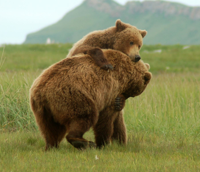

In [19]:
# show a black bear
images = list((bear_dir / "grizzly") .glob("*.jpg"))
im = PILImage.create(images[10])
im.to_thumb(200)


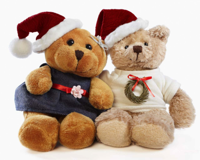

In [16]:
# show a black bear
images = list((bear_dir / "teddy") .glob("*.jpg"))
im = PILImage.create(images[10])
im.to_thumb(200)

    

In [23]:
#from fastai.data.transforms import get_image_files
from fastai.data.all import get_image_files
from fastai.vision.all import ImageBlock, CategoryBlock
from fastai.data.block import DataBlock
from fastai.data.transforms import RandomSplitter, parent_label
from fastai.vision.augment import Resize


In [8]:
get_image_files(bear_dir)

(#41) [Path('my-images/bears/black-bear/black-bear-16.jpg'),Path('my-images/bears/black-bear/black-bear-17.jpg'),Path('my-images/bears/black-bear/black-bear-18.jpg'),Path('my-images/bears/black-bear/black-bear-19.jpg'),Path('my-images/bears/black-bear/black-bear-20.jpg'),Path('my-images/bears/black-bear/black-bear-21.jpg'),Path('my-images/bears/black-bear/black-bear-22.jpg'),Path('my-images/bears/black-bear/black-bear-23.jpg'),Path('my-images/bears/black-bear/black-bear-24.jpg'),Path('my-images/bears/black-bear/black-bear-25.jpg')...]

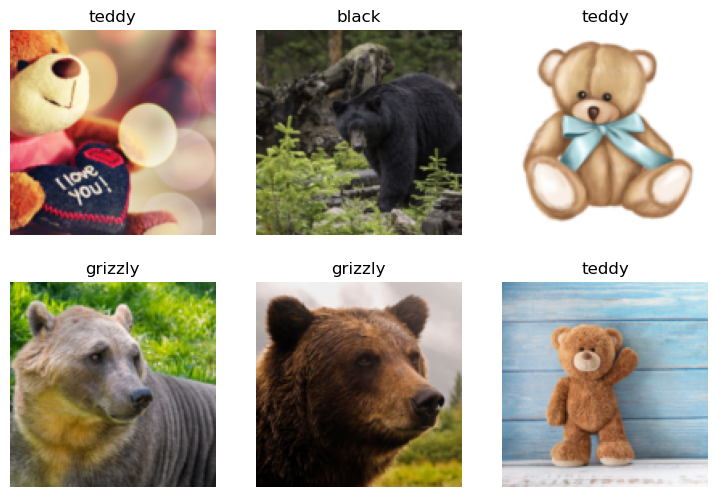

In [51]:



bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=22),
    get_y = parent_label,
    item_tfms = Resize(128)
        
)
dls = bears.dataloaders(bear_dir)
dls.valid.show_batch(max_n=6, nrows=2)

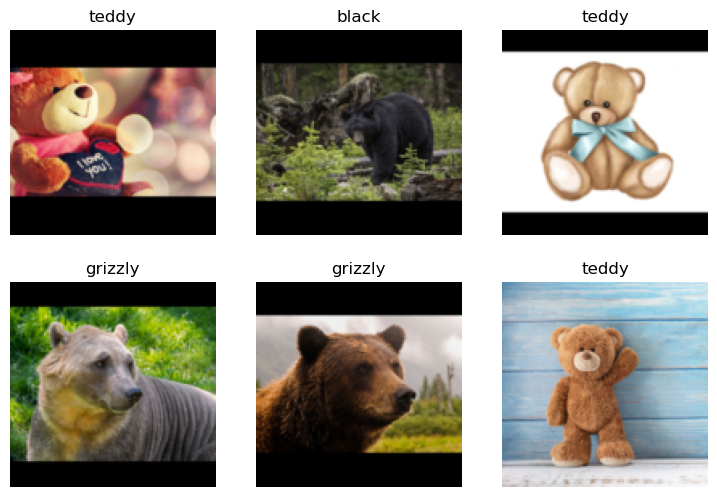

In [52]:
from fastai.vision.augment import ResizeMethod
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(bear_dir)
dls.valid.show_batch(max_n=6, nrows=2)

In [68]:
from fastai.vision.augment import RandomResizedCrop, aug_transforms

bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5)
    #batch_tfms = aug_transforms()
)
dls = bears.dataloaders(bear_dir)

In [69]:
from fastai.metrics import error_rate
from torchvision.models import resnet18
from fastai.vision.learner import vision_learner

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.385222,0.299124,0.138462,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.212603,0.067305,0.030769,00:09
1,0.150821,0.068902,0.030769,00:08


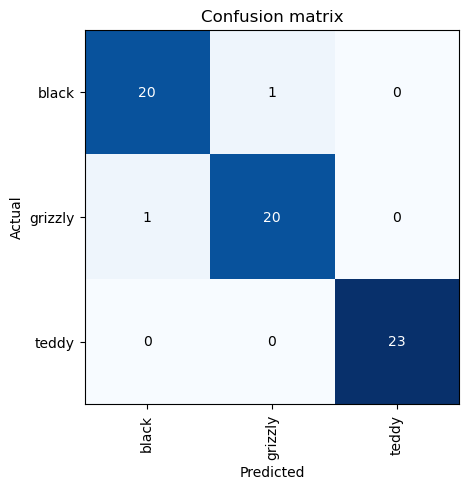

In [70]:
from fastai.interpret import ClassificationInterpretation

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

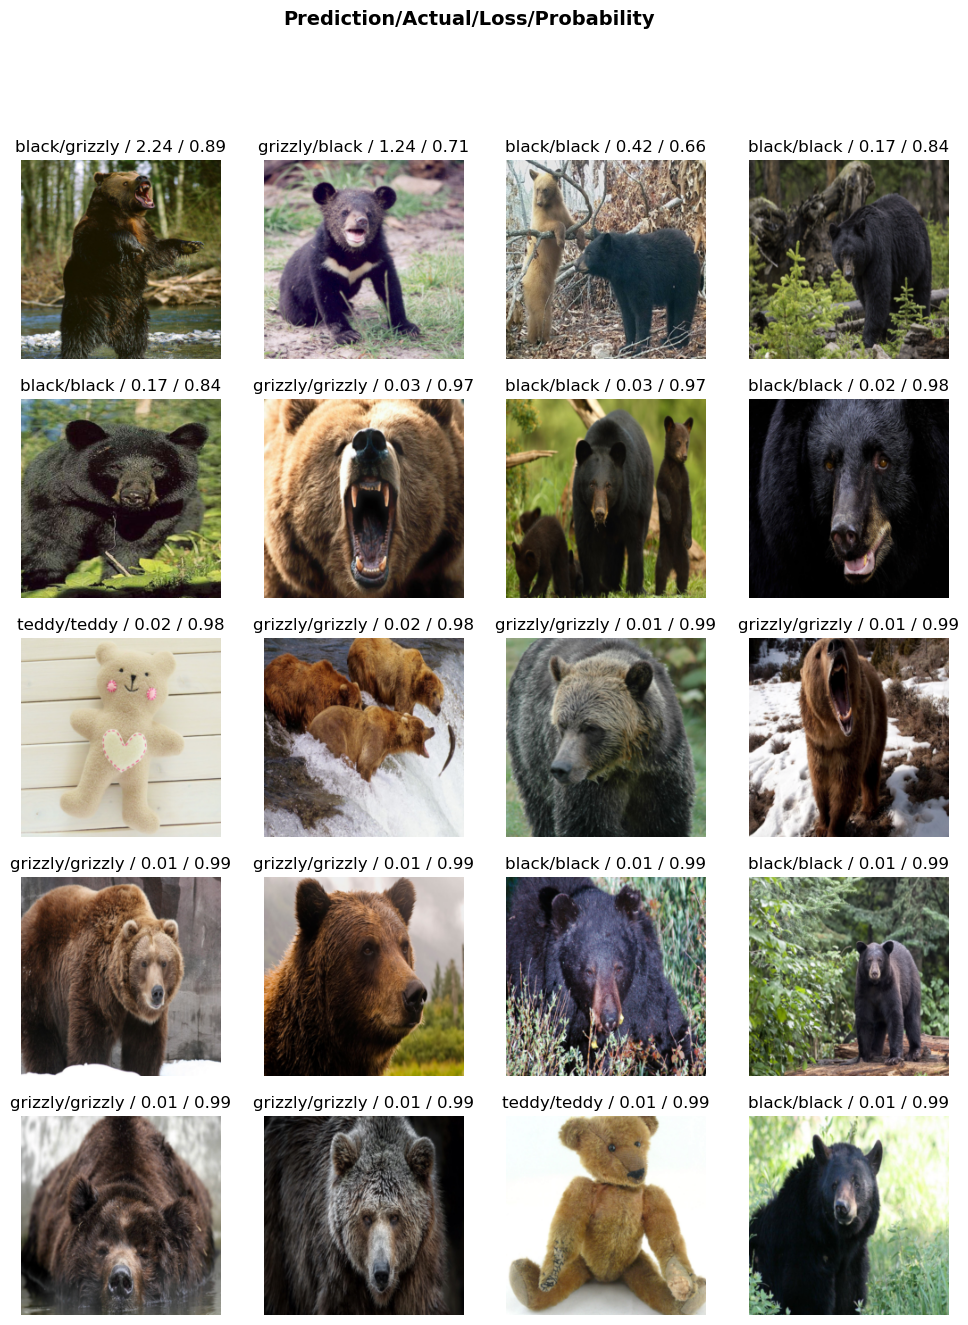

In [75]:
interp.plot_top_losses(20, nrows=5)

In [ ]:
learn.export()

In [82]:
from fastai.learner import load_learner

learn2 = load_learner("export.pkl")

In [89]:
black_bear = bear_dir/ "black/black-123.jpg"
learn2.predict(black_bear)

('black', tensor(0), tensor([9.9996e-01, 1.6907e-05, 2.6810e-05]))

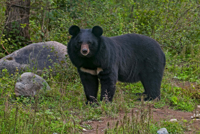

In [90]:
im = PILImage.create(black_bear)
im.to_thumb(200)

In [87]:
learn2.dls.vocab

['black', 'grizzly', 'teddy']